In [2]:
# 📦 Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [5]:
df = pd.read_csv("/dataset_safezone_rico.csv")  # certifique-se que o CSV está no mesmo diretório
print("Visualização inicial:")
print(df.head())

Visualização inicial:
       regiao  temperatura  umidade  nivel_agua  alerta
0    Interior         28.1       58          78       0
1      Centro         31.1       80          77       0
2    Interior         36.9       46          35       0
3  Zona Leste         23.9       85          76       1
4     Litoral         23.5       43          94       0


In [6]:
# 📍 Verificar distribuição por região
print("\nRegistros por região:")
print(df['regiao'].value_counts())


Registros por região:
regiao
Zona Sul      28
Zona Leste    26
Interior      23
Zona Oeste    22
Litoral       21
Centro        20
Zona Norte    10
Name: count, dtype: int64


In [7]:
# 🔁 Codificar a variável categórica 'regiao'
df_encoded = pd.get_dummies(df, columns=['regiao'])
print("\nApós codificação:")
print(df_encoded.head())


Após codificação:
   temperatura  umidade  nivel_agua  alerta  regiao_Centro  regiao_Interior  \
0         28.1       58          78       0          False             True   
1         31.1       80          77       0           True            False   
2         36.9       46          35       0          False             True   
3         23.9       85          76       1          False            False   
4         23.5       43          94       0          False            False   

   regiao_Litoral  regiao_Zona Leste  regiao_Zona Norte  regiao_Zona Oeste  \
0           False              False              False              False   
1           False              False              False              False   
2           False              False              False              False   
3           False               True              False              False   
4            True              False              False              False   

   regiao_Zona Sul  
0            Fal

In [8]:
# ✂️ Separar features e alvo
X = df_encoded.drop("alerta", axis=1)
y = df_encoded["alerta"]

In [9]:
# 🔀 Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# 🧠 Treinamento do modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# ✅ Avaliação do modelo
y_pred = model.predict(X_test)
print("\nMatriz de confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))


Matriz de confusão:
[[45]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


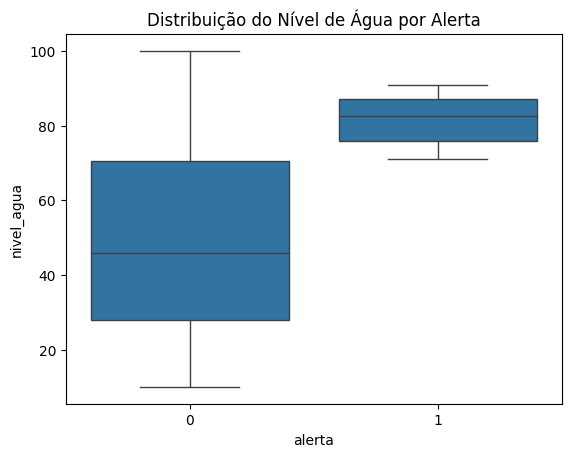

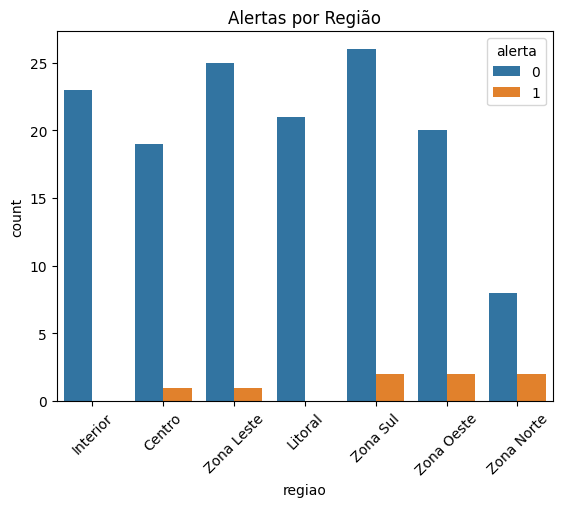

In [12]:
# 📈 Visualização dos dados
sns.boxplot(x="alerta", y="nivel_agua", data=df)
plt.title("Distribuição do Nível de Água por Alerta")
plt.show()

sns.countplot(x="regiao", hue="alerta", data=df)
plt.title("Alertas por Região")
plt.xticks(rotation=45)
plt.show()

In [13]:
# 💾 Exportar o modelo treinado
joblib.dump(model, "modelo_safezone.pkl")
print("\nModelo salvo como 'modelo_safezone.pkl'")


Modelo salvo como 'modelo_safezone.pkl'


In [20]:
# 🤖 Previsão personalizada com cenários
print("\n🔍 Previsão personalizada por cenário:")
cenarios = {
    "1": {"temperatura": 30, "umidade": 45, "nivel_agua": 20, "descricao": "Céu limpo, clima seco"},
    "2": {"temperatura": 26, "umidade": 70, "nivel_agua": 50, "descricao": "Chuva moderada"},
    "3": {"temperatura": 24, "umidade": 90, "nivel_agua": 85, "descricao": "Chuva forte, nível elevado"}
}

print("Cenários disponíveis:")
for k, v in cenarios.items():
    print(f"{k} - {v['descricao']}")

opcao = input("Escolha o número do cenário desejado: ")

regioes_possiveis = ['Centro', 'Zona Norte', 'Zona Sul', 'Zona Leste', 'Zona Oeste', 'Interior', 'Litoral']
regiao_input = input("Informe sua região (exatamente como: Centro, Zona Norte, etc): ")

if opcao not in cenarios or regiao_input not in regioes_possiveis:
    print("❌ Opção ou região inválida.")
else:
    dados = cenarios[opcao]

    dados_usuario = {
        'temperatura': dados['temperatura'],
        'umidade': dados['umidade'],
        'nivel_agua': dados['nivel_agua']
    }

    for reg in regioes_possiveis:
        dados_usuario[f'regiao_{reg}'] = 1 if reg == regiao_input else 0

    df_usuario = pd.DataFrame([dados_usuario])
    df_usuario = df_usuario[X.columns]
    resultado = model.predict(df_usuario)[0]


    print(f"\n📍 Região: {regiao_input}")
print(f"🌡️ Temperatura: entre {dados['temperatura'] - 1}°C e {dados['temperatura'] + 1}°C")
print(f"💧 Umidade: entre {dados['umidade'] - 5}% e {dados['umidade'] + 5}%")
print(f"🌊 Nível de água: entre {dados['nivel_agua'] - 5} e {dados['nivel_agua'] + 5}")

if resultado == 1:
    print("🚨 ALERTA: Há risco elevado de enchente na sua região!")
else:
    print("✅ Situação segura: Nenhum risco elevado identificado no momento.")



🔍 Previsão personalizada por cenário:
Cenários disponíveis:
1 - Céu limpo, clima seco
2 - Chuva moderada
3 - Chuva forte, nível elevado
Escolha o número do cenário desejado: 3
Informe sua região (exatamente como: Centro, Zona Norte, etc): Zona Sul

📍 Região: Zona Sul
🌡️ Temperatura: entre 23°C e 25°C
💧 Umidade: entre 85% e 95%
🌊 Nível de água: entre 80 e 90
🚨 ALERTA: Há risco elevado de enchente na sua região!
